In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [80]:
csv_test = pd.read_csv('/Users/kimginam/ML/Melbourne_housing_FULL.csv')
df = csv_test
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [120]:
df['Rooms'].value_counts()

3     13611
2      7474
4      7191
5      1546
1      1303
6       188
7        31
8        15
10        6
12        3
9         2
16        1
Name: Rooms, dtype: int64

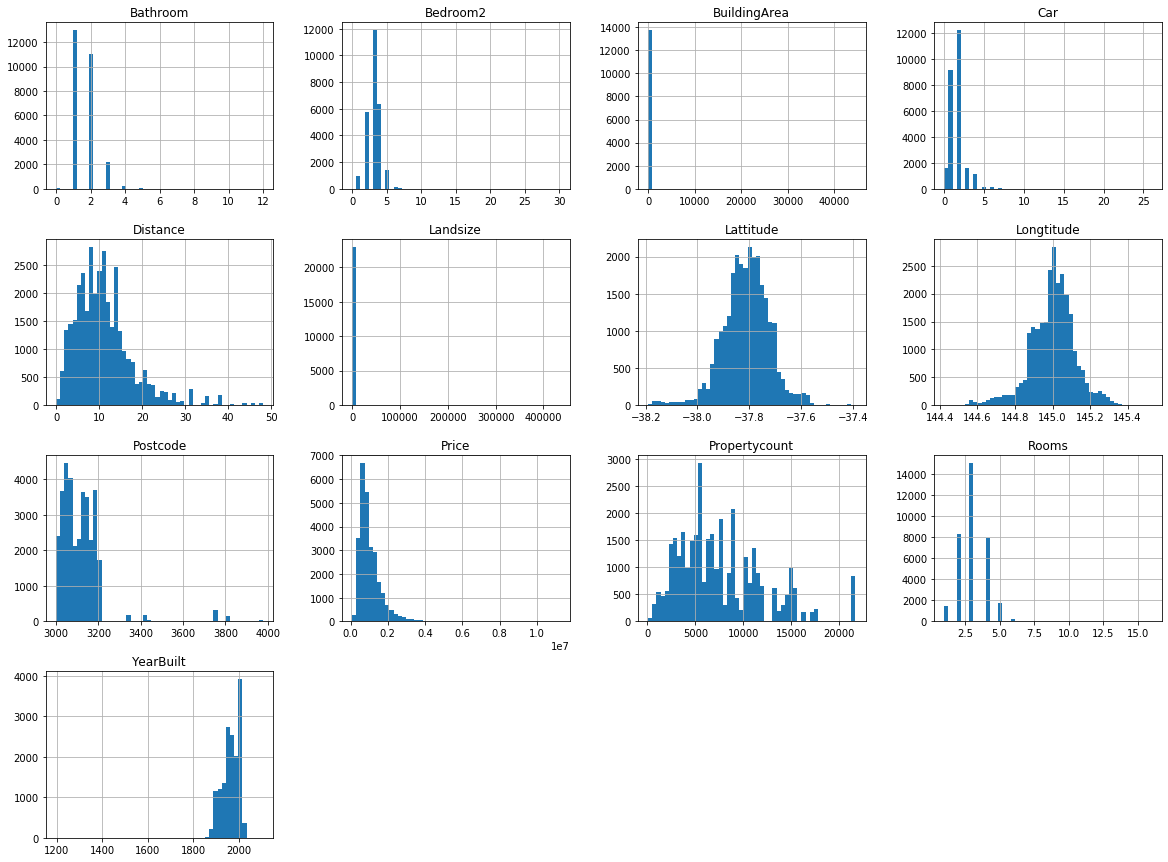

In [83]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1)

In [85]:
print(len(train_set), "train +", len(test_set), "test")

31371 train + 3486 test


In [86]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [87]:
train_set['Price'].value_counts()

1100000.0    212
600000.0     209
800000.0     204
650000.0     195
1300000.0    191
            ... 
715750.0       1
566100.0       1
1328800.0      1
3660000.0      1
1577500.0      1
Name: Price, Length: 2764, dtype: int64

In [88]:
df = train_set.copy()

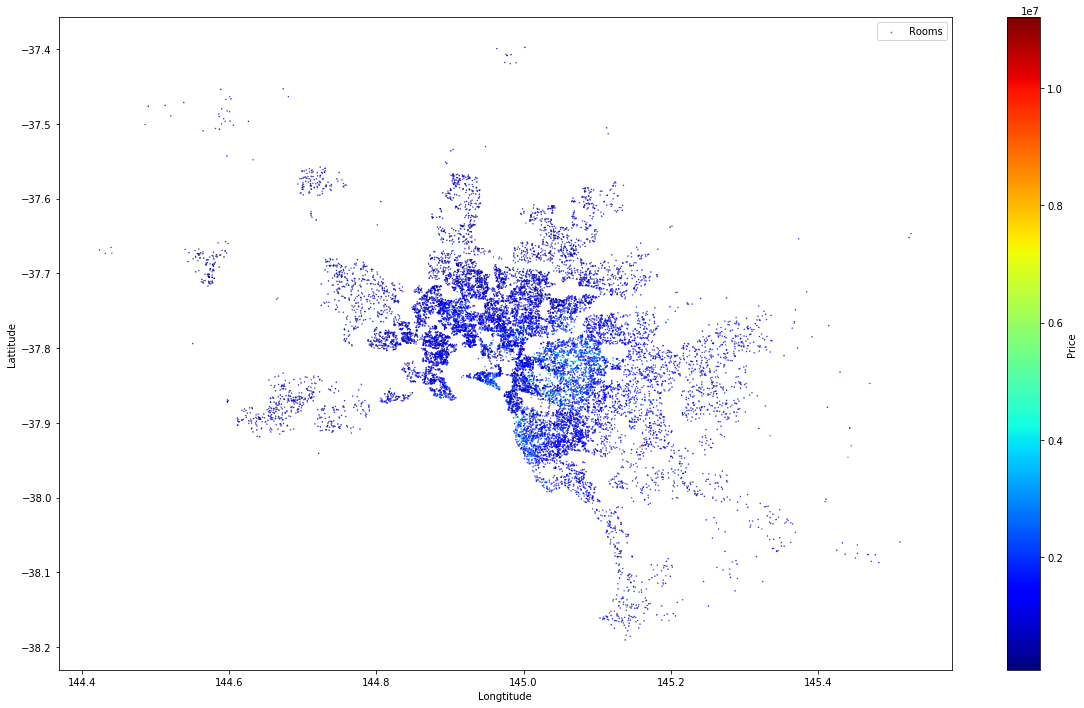

In [116]:
ax = df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=1,
    s=df["Rooms"]/20, label="Rooms", figsize=(20,12),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='Longtitude', ylabel='Lattitude')
plt.legend()

In [118]:
corr_matrix = df.corr()

In [119]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.466062
Bedroom2         0.429357
Bathroom         0.428072
Car              0.198829
Longtitude       0.196095
BuildingArea     0.095942
Postcode         0.043726
Landsize         0.032664
Propertycount   -0.059286
Distance        -0.212752
Lattitude       -0.214837
YearBuilt       -0.330962
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35526950>,
      dtype=object)

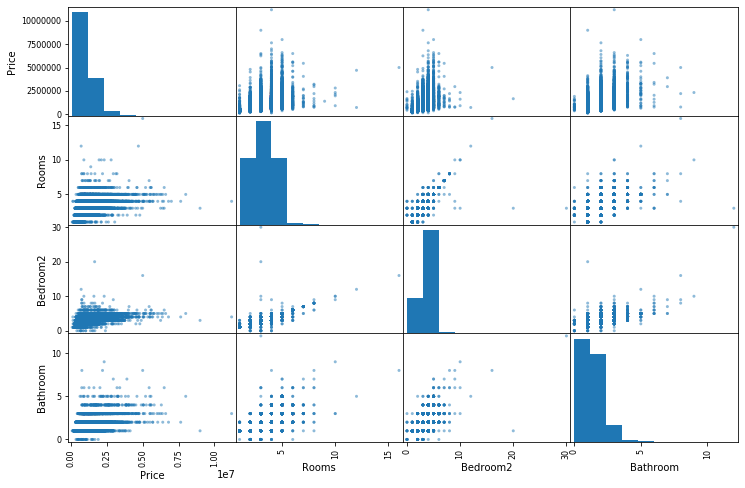

In [121]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2",
              "Bathroom"]
scatter_matrix(df[attributes], figsize=(12, 8))

[0, 50, 0, 13000000]

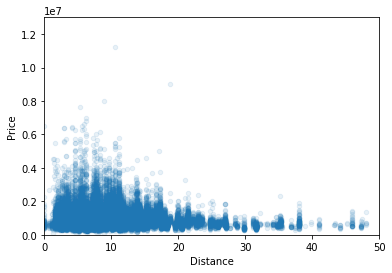

In [142]:
df.plot(kind="scatter", x="Distance", y="Price",
             alpha=0.1)
plt.axis([0, 50, 0, 13000000])

[0, 50, 0, 13000000]

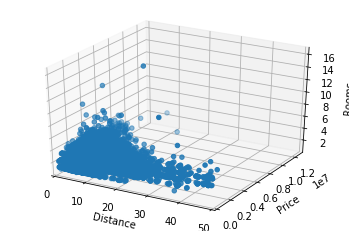

In [175]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = df["Distance"]
ys = df["Price"]
zs = df["Rooms"]
ax.scatter(xs, ys, zs)

ax.set_xlabel('Distance')
ax.set_ylabel('Price')
ax.set_zlabel('Rooms')

plt.axis([0, 50, 0, 13000000])

In [195]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [196]:
housing_num = train_set.drop(['Regionname', 'CouncilArea', 'Date', 'SellerG', 'Method', 'Type', 'Address', 'Suburb'], axis=1)

In [197]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [198]:
imputer.statistics_

array([ 3.0000000e+00,  8.7500000e+05,  1.0300000e+01,  3.1030000e+03,
        3.0000000e+00,  2.0000000e+00,  2.0000000e+00,  5.2100000e+02,
        1.3600000e+02,  1.9700000e+03, -3.7807790e+01,  1.4500817e+02,
        6.7630000e+03])

In [199]:
housing_num.median().values

array([ 3.0000000e+00,  8.7500000e+05,  1.0300000e+01,  3.1030000e+03,
        3.0000000e+00,  2.0000000e+00,  2.0000000e+00,  5.2100000e+02,
        1.3600000e+02,  1.9700000e+03, -3.7807790e+01,  1.4500817e+02,
        6.7630000e+03])

In [203]:
X = imputer.fit_transform(housing_num)

In [204]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31371 entries, 4867 to 18092
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         31371 non-null  object 
 1   Address        31371 non-null  object 
 2   Rooms          31371 non-null  int64  
 3   Type           31371 non-null  object 
 4   Price          24510 non-null  float64
 5   Method         31371 non-null  object 
 6   SellerG        31371 non-null  object 
 7   Date           31371 non-null  object 
 8   Distance       31370 non-null  float64
 9   Postcode       31370 non-null  float64
 10  Bedroom2       23946 non-null  float64
 11  Bathroom       23940 non-null  float64
 12  Car            23490 non-null  float64
 13  Landsize       20715 non-null  float64
 14  BuildingArea   12288 non-null  float64
 15  YearBuilt      13907 non-null  float64
 16  CouncilArea    31369 non-null  object 
 17  Lattitude      24159 non-null  float64
 18  Lon

In [206]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(df.index.values))